In [94]:
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import LeaveOneOut

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

#from sklearn.testing import all_estimators
from lazypredict.Supervised import LazyClassifier

from matplotlib import pyplot as plt

In [95]:
def roda_modelo(model, df:pd.DataFrame):
    y = df["ICU"]
    X = df.drop(["ICU", 'PATIENT_VISIT_IDENTIFIER'], axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size=0.20)
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    prob_pred = model.predict_proba(X_test)
    
    auc = roc_auc_score(y_test, prob_pred[:,1])
    
    print(f'AUC: {auc}')
    print('\nClassification Report')
    print(classification_report(y_test, pred))
    
def roda_n_modelos(model, df:pd.DataFrame, n:int):
    y = df["ICU"]
    X = df.drop(["ICU", 'PATIENT_VISIT_IDENTIFIER'], axis=1)
    
    auc_list = []
    for _ in range(n):
        X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size=0.15)
    
        model.fit(X_train, y_train)
        prob_pred = model.predict_proba(X_test)
    
        auc = roc_auc_score(y_test, prob_pred[:,1])
        auc_list.append(auc)
    
    auc_mean = np.mean(auc_list)
    auc_std = np.std(auc_list)
    print(f'AUC Mean: {auc_mean.round(2)}\nAUC Std: {auc_std.round(3)}\nAUC CI: {(auc_mean - (2*auc_std)).round(2)} - {(auc_mean + (2*auc_std)).round(2)}')
    
    return auc_list


def roda_n_modelo_cv(model, df:pd.DataFrame, n_splits:int, n_repeats:int):
    
    np.random.seed(1991237)
    
    df = df.sample(frac=1).reset_index(drop=True)
    y = df["ICU"]
    X = df.drop(["ICU", 'PATIENT_VISIT_IDENTIFIER'], axis=1)
    
    cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats = n_repeats)
    result = cross_validate(log_clf, X, y, cv=cv, scoring='roc_auc')
    
    auc_mean = np.mean(result['test_score'])
    auc_std = np.std(result['test_score'])
    print(f'AUC Mean: {auc_mean.round(2)}\nAUC Std: {auc_std.round(3)}\nAUC CI: {(auc_mean - (2*auc_std)).round(2)} - {(auc_mean + (2*auc_std)).round(2)}')
    
    return result['test_score']

    

In [96]:
rand = 98123

In [97]:
df = pd.read_csv('../data/processed/processed_data.csv', index_col=0)
pd.set_option('max_columns', df.shape[1]) #Adjust the plotting visualizationto make all columns visible in a plot
df.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,BE_ARTERIAL_MEDIAN,BE_VENOUS_MEDIAN,BIC_ARTERIAL_MEDIAN,BIC_VENOUS_MEDIAN,BILLIRUBIN_MEDIAN,BLAST_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,GLUCOSE_MEDIAN,HEMATOCRITE_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LEUKOCYTES_MEDIAN,LINFOCITOS_MEDIAN,P02_ARTERIAL_MEDIAN,P02_VENOUS_MEDIAN,PC02_ARTERIAL_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,PH_ARTERIAL_MEDIAN,PH_VENOUS_MEDIAN,PLATELETS_MEDIAN,POTASSIUM_MEDIAN,SAT02_ARTERIAL_MEDIAN,SAT02_VENOUS_MEDIAN,SODIUM_MEDIAN,TGO_MEDIAN,TGP_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,OXYGEN_SATURATION_DIFF_REL,ICU
0,0,1,0.11,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-0.32,-0.32,-0.94,-1.00,0.18,-0.87,-0.74,-0.95,-0.89,0.09,-0.93,1.00,-0.84,-0.91,-0.17,-0.70,-0.78,-0.75,-0.88,0.23,0.36,-0.54,-0.52,0.94,0.35,-0.03,-1.00,-0.99,-0.83,-0.84,-0.99,0.09,-0.23,-0.28,-0.59,-0.29,0.74,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1
1,2,0,-1.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-0.32,-0.32,-0.94,-1.00,0.36,-0.91,-0.74,-0.96,-0.78,0.14,-0.96,1.00,-0.38,-0.91,-0.17,-0.70,-0.78,-0.75,-0.94,0.23,0.36,-0.40,-0.70,0.94,0.35,0.09,-1.00,-0.99,-0.85,-0.84,-0.98,-0.49,-0.69,-0.05,-0.65,0.36,0.94,-0.55,-0.53,-0.60,-0.76,-1.00,-0.96,-0.96,1
2,3,0,-0.33,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,-0.26,-1.00,-1.00,-0.32,-0.32,-0.97,-1.00,0.33,-0.97,-0.19,-0.32,-0.89,-0.20,-0.96,-0.83,-0.73,-0.84,-0.17,-0.63,-0.78,-0.78,-0.50,0.23,0.36,-0.56,-0.78,0.94,0.58,0.20,-0.99,-0.96,-0.85,-0.94,-0.98,0.01,-0.37,-0.53,-0.46,-0.29,0.68,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0
3,4,0,-1.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-0.32,-0.32,-0.94,-1.00,0.36,-0.91,-0.83,-0.94,-0.85,0.36,-0.96,1.00,-0.70,-0.64,-0.17,-0.70,-0.78,-0.75,-0.99,0.23,0.36,-0.46,-0.59,0.94,0.35,0.14,-1.00,-0.99,-0.85,-0.90,-1.00,0.33,-0.15,0.16,-0.59,0.29,0.87,-1.00,-0.88,-0.92,-0.88,-0.95,-0.98,-0.98,0
4,5,0,-1.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.61,-1.00,-1.00,-0.32,-0.32,-0.94,-1.00,0.36,-0.89,-0.74,-0.96,-0.89,0.29,-0.96,1.00,-0.71,-0.34,-0.17,-0.70,-0.78,-0.75,-1.00,0.23,0.36,-0.29,-0.67,0.94,0.35,0.09,-1.00,-0.99,-0.85,-0.88,-1.00,-0.04,-0.54,-0.54,-0.53,-0.20,0.82,-0.83,-0.75,-0.98,-1.00,-0.98,-0.98,-0.98,0


In [98]:
y = df["ICU"]
X = df.drop(["ICU", 'PATIENT_VISIT_IDENTIFIER'], axis=1)

In [99]:
X.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [100]:
np.random.seed(rand)
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size=0.15)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size=0.25)

In [101]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

263 263
88 88


## Dummy Classifier

In [102]:
dummy_model = DummyClassifier(strategy="prior")
dummy_model = dummy_model.fit(X_train, y_train)
sum(dummy_model.predict(X_test) == y_test) / len(y_test) * 100

53.40909090909091

In [103]:
dummy_score = accuracy_score(y_test, dummy_model.predict(X_test))
print(f'Dummy Score: {dummy_score.round(4)*100}%')

Dummy Score: 53.410000000000004%


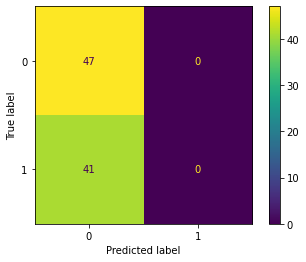

In [104]:
plot_confusion_matrix(dummy_model, X_test, y_test)

## Logistic Regression

In [105]:
log_clf = LogisticRegression(random_state=rand).fit(X_train, y_train)

In [106]:
log_clf_score = accuracy_score(y_test, log_clf.predict(X_test))
print(f'Dummy Score: {log_clf_score.round(4)*100}%')

Dummy Score: 71.59%


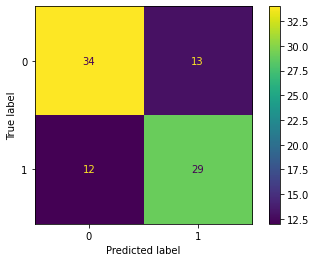

In [107]:
plot_confusion_matrix(log_clf, X_test, y_test)

In [108]:
print(classification_report(y_test, log_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73        47
           1       0.69      0.71      0.70        41

    accuracy                           0.72        88
   macro avg       0.71      0.72      0.71        88
weighted avg       0.72      0.72      0.72        88



In [109]:
log_clf_prob = log_clf.predict_proba(X_test)#duas colunas. [0] Prob do resultado ser zero; [1] prob do resultado ser 1

roc_auc_score(y_test, log_clf_prob[:,1])

0.777893098079917

In [110]:
roda_modelo(log_clf, df)

AUC: 0.766347687400319

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.82      0.78        38
           1       0.77      0.70      0.73        33

    accuracy                           0.76        71
   macro avg       0.76      0.76      0.76        71
weighted avg       0.76      0.76      0.76        71



In [111]:
z = roda_n_modelos(log_clf, df,100)

AUC Mean: 0.78
AUC Std: 0.065
AUC CI: 0.65 - 0.91


(array([ 2.,  9.,  7., 11., 14., 14., 19., 14.,  9.,  1.]),
 array([0.62068966, 0.65028736, 0.67988506, 0.70948276, 0.73908046,
        0.76867816, 0.79827586, 0.82787356, 0.85747126, 0.88706897,
        0.91666667]),
 <BarContainer object of 10 artists>)

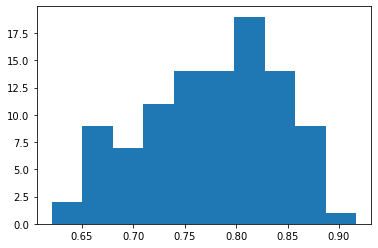

In [112]:
plt.hist(z)

In [113]:
k2, p = stats.normaltest(z)
k2, p

(4.20848809706434, 0.12193781850929157)

In [114]:
y.size/15

23.4

In [115]:
cv = StratifiedKFold(10, shuffle=True)
cross_validate(log_clf, X, y, cv=cv)

{'fit_time': array([0.0362525 , 0.0315547 , 0.02500582, 0.03586006, 0.03216338,
        0.02194023, 0.03561115, 0.02980185, 0.02437305, 0.02693081]),
 'score_time': array([0.00398088, 0.00442004, 0.00295353, 0.00299096, 0.00199366,
        0.00504851, 0.00237131, 0.00303841, 0.00199723, 0.00203538]),
 'test_score': array([0.77777778, 0.77142857, 0.77142857, 0.71428571, 0.77142857,
        0.74285714, 0.74285714, 0.6       , 0.6       , 0.68571429])}

In [116]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)
cross_validate(log_clf, X, y, cv=cv)

{'fit_time': array([0.04727292, 0.02354765, 0.02779818, 0.03204489, 0.03021646,
        0.03303981, 0.02525187, 0.02945805, 0.02244973, 0.02872491,
        0.0279727 , 0.0290153 , 0.02414393, 0.03393054, 0.02005029,
        0.02594924, 0.02891684, 0.02708125, 0.03188992, 0.02794242,
        0.0234797 , 0.01879048, 0.01689076, 0.02198482, 0.02804375,
        0.02974057, 0.02742076, 0.02494812, 0.03305793, 0.02397776,
        0.02582455, 0.01917124, 0.02772617, 0.02294564, 0.02533722,
        0.02993679, 0.0244596 , 0.01833391, 0.02355719, 0.02419734,
        0.03598714, 0.02692771, 0.02646112, 0.01747346, 0.02592564,
        0.02596593, 0.03515172, 0.02301979, 0.0249331 , 0.02595305,
        0.01796436, 0.02562237, 0.02217603, 0.02902222, 0.02694559,
        0.02198029, 0.01998711, 0.01689672, 0.02717853, 0.02507377,
        0.02241206, 0.02396965, 0.03143692, 0.04428029, 0.02760363,
        0.02896285, 0.02896976, 0.03450179, 0.03439283, 0.03299308,
        0.030303  , 0.0322876 , 0.02

In [120]:
cv = LeaveOneOut()
cross_validate(log_clf, X, y, cv=cv)

{'fit_time': array([0.03554249, 0.03502083, 0.02898002, 0.02194929, 0.03653097,
        0.02588987, 0.02946162, 0.02475119, 0.02394366, 0.02782011,
        0.02094579, 0.0277226 , 0.02770042, 0.02858615, 0.02336645,
        0.03093863, 0.02898741, 0.02297664, 0.02539301, 0.02024817,
        0.03003335, 0.0240016 , 0.03537107, 0.02368212, 0.03504348,
        0.02194214, 0.0239625 , 0.02198315, 0.02351141, 0.02421474,
        0.02854252, 0.03455043, 0.03591323, 0.0316298 , 0.03346992,
        0.03774619, 0.03296399, 0.03296685, 0.03255844, 0.03252888,
        0.03389215, 0.03741837, 0.03040814, 0.03093886, 0.03425765,
        0.02893853, 0.02924037, 0.03063679, 0.0234127 , 0.02655602,
        0.03835011, 0.03130841, 0.03174901, 0.03072095, 0.03214741,
        0.0255785 , 0.02842999, 0.0328331 , 0.02842689, 0.02379084,
        0.02384377, 0.02504635, 0.0284245 , 0.03369236, 0.02753496,
        0.02827358, 0.02780724, 0.02999187, 0.03351665, 0.02501369,
        0.02922773, 0.02216935, 0.03

In [123]:
np.mean([0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
        0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
        0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
        1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
        1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
        1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
        1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
        1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
        1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
        0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.])

0.7122507122507122

In [119]:
# One of the simplest options to get a feeling for the "influence" of a given parameter in a linear classification model (logistic being one of those), is to consider the magnitude of its coefficient times the standard deviation of the corresponding parameter in the data.
(log_clf.coef_[0] * np.std(X_test)).abs().sort_values(ascending=False)

AGE_PERCENTIL                  0.67
BLOODPRESSURE_DIASTOLIC_MEAN   0.42
PCR_MEDIAN                     0.26
LACTATE_MEDIAN                 0.26
GENDER                         0.21
RESPIRATORY_RATE_MEAN          0.21
HTN                            0.21
DISEASE GROUPING 1             0.20
BLOODPRESSURE_SISTOLIC_MEAN    0.20
DIMER_MEDIAN                   0.18
SODIUM_MEDIAN                  0.15
DISEASE GROUPING 3             0.15
DISEASE GROUPING 5             0.13
SAT02_VENOUS_MEDIAN            0.13
DISEASE GROUPING 4             0.10
POTASSIUM_MEDIAN               0.09
LINFOCITOS_MEDIAN              0.09
DISEASE GROUPING 2             0.08
CREATININ_MEDIAN               0.08
GLUCOSE_MEDIAN                 0.08
BLAST_MEDIAN                   0.07
SAT02_ARTERIAL_MEDIAN          0.07
OXYGEN_SATURATION_MEAN         0.06
CALCIUM_MEDIAN                 0.06
OTHER                          0.06
AGE_ABOVE65                    0.05
BIC_VENOUS_MEDIAN              0.05
BLOODPRESSURE_SISTOLIC_DIFF 

## Random Forest Classifier

In [57]:
rf_clf = RandomForestClassifier(random_state=rand, n_estimators=10)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=98123)

In [58]:
rf_clf_score = accuracy_score(y_test, rf_clf.predict(X_test))
print(f'Dummy Score: {(rf_clf_score*100).round(2)}%')

Dummy Score: 72.73%


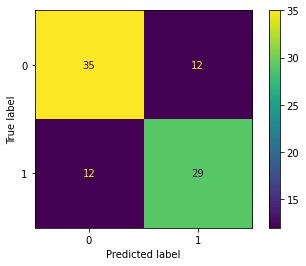

In [59]:
plot_confusion_matrix(rf_clf, X_test, y_test)

In [60]:
print(classification_report(y_test, rf_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        47
           1       0.71      0.71      0.71        41

    accuracy                           0.73        88
   macro avg       0.73      0.73      0.73        88
weighted avg       0.73      0.73      0.73        88



In [61]:
rf_clf_prob = rf_clf.predict_proba(X_test)#duas colunas. [0] Prob do resultado ser zero; [1] prob do resultado ser 1

roc_auc_score(y_test, rf_clf_prob[:,1])

0.7519460300985988

In [92]:
z = roda_n_modelo_cv(rf_clf, df=df, n_splits=20, n_repeats=30)

AUC Mean: 0.78
AUC Std: 0.11
AUC CI: 0.56 - 1.0


(array([  7.,  15.,  17.,  39.,  77., 100., 137., 105.,  69.,  34.]),
 array([0.425 , 0.4825, 0.54  , 0.5975, 0.655 , 0.7125, 0.77  , 0.8275,
        0.885 , 0.9425, 1.    ]),
 <BarContainer object of 10 artists>)

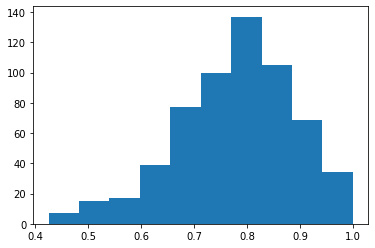

In [93]:
plt.hist(z)

## LazyPredict

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)

In [ ]:
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

In [ ]:
print(models)